In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

## Carga de los datos

In [2]:
data_folder='./proyecto_data/'

In [3]:
column_names=(
                'SalePrice', 
                'OverallQual',
                '1stFlrSF',
                'TotRmsAbvGrd',
                'YearBuilt',
                'LotFrontage'
)

In [4]:
mat_values=np.load(data_folder+'proyecto_training_data.npy')

### Separacion en train and test

In [5]:
n_rows=mat_values.shape[0]
shuffle_rows=np.random.choice(n_rows,n_rows,replace=False)
mat_values_shuffle=mat_values[shuffle_rows]

In [6]:
training, test = mat_values_shuffle[:int(n_rows*0.8),:], mat_values_shuffle[int(n_rows*0.8):,:]

In [7]:
trn_df=pd.DataFrame(training, columns=column_names)

In [8]:
tst_df=pd.DataFrame(test, columns=column_names)

In [9]:
saleprice_df=pd.DataFrame(mat_values, columns=column_names)

## Descripcion de los datos

In [10]:
trn_df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,960.000000
mean,181262.752568,6.092466,1165.011986,6.560788,1971.000856,69.598958
std,80252.758706,1.401436,392.674029,1.617620,30.425109,23.307229
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,130000.000000,5.000000,882.000000,6.000000,1954.000000,59.000000
50%,163500.000000,6.000000,1086.000000,6.000000,1972.000000,70.000000
75%,215000.000000,7.000000,1392.500000,7.000000,2000.250000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


## 4. DISTRIBUCIONES

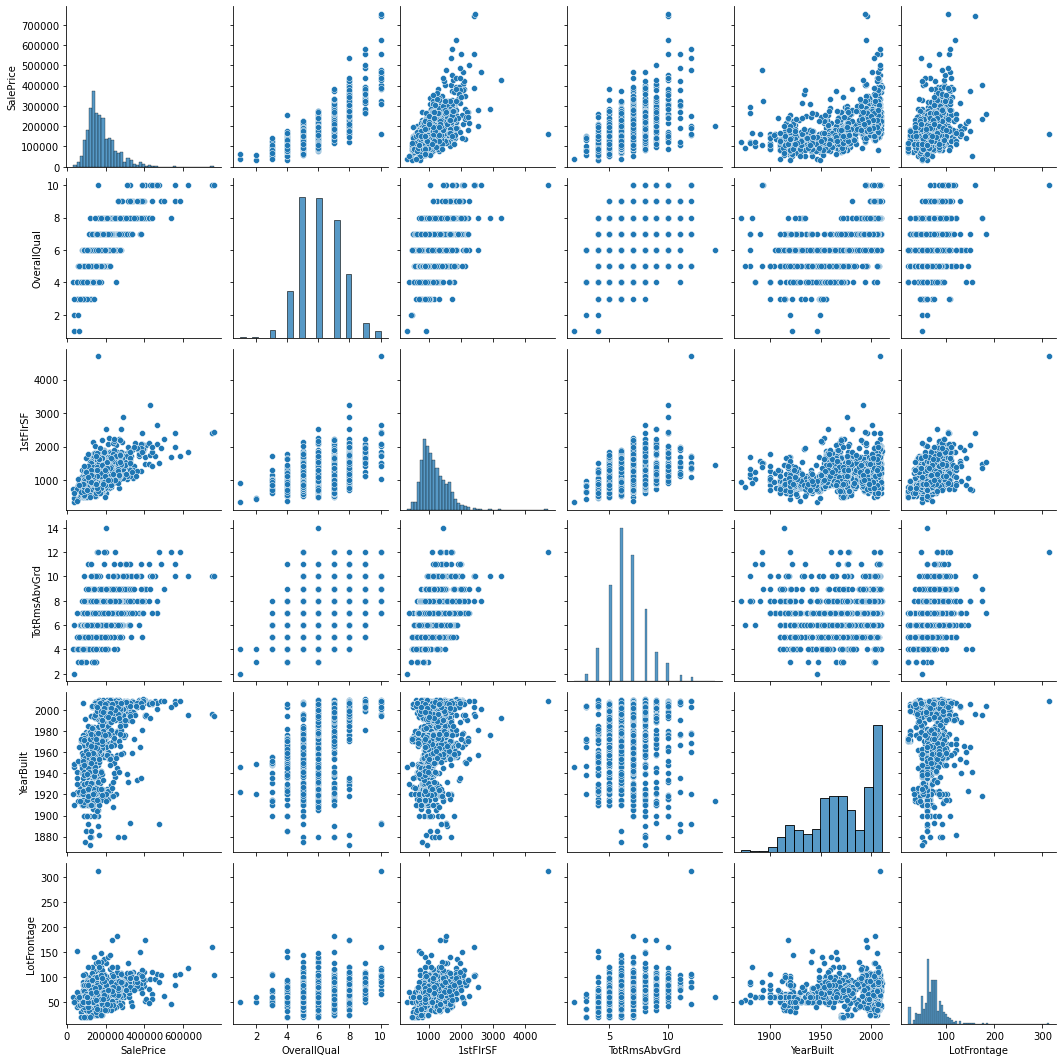

In [11]:
sns.pairplot(trn_df)

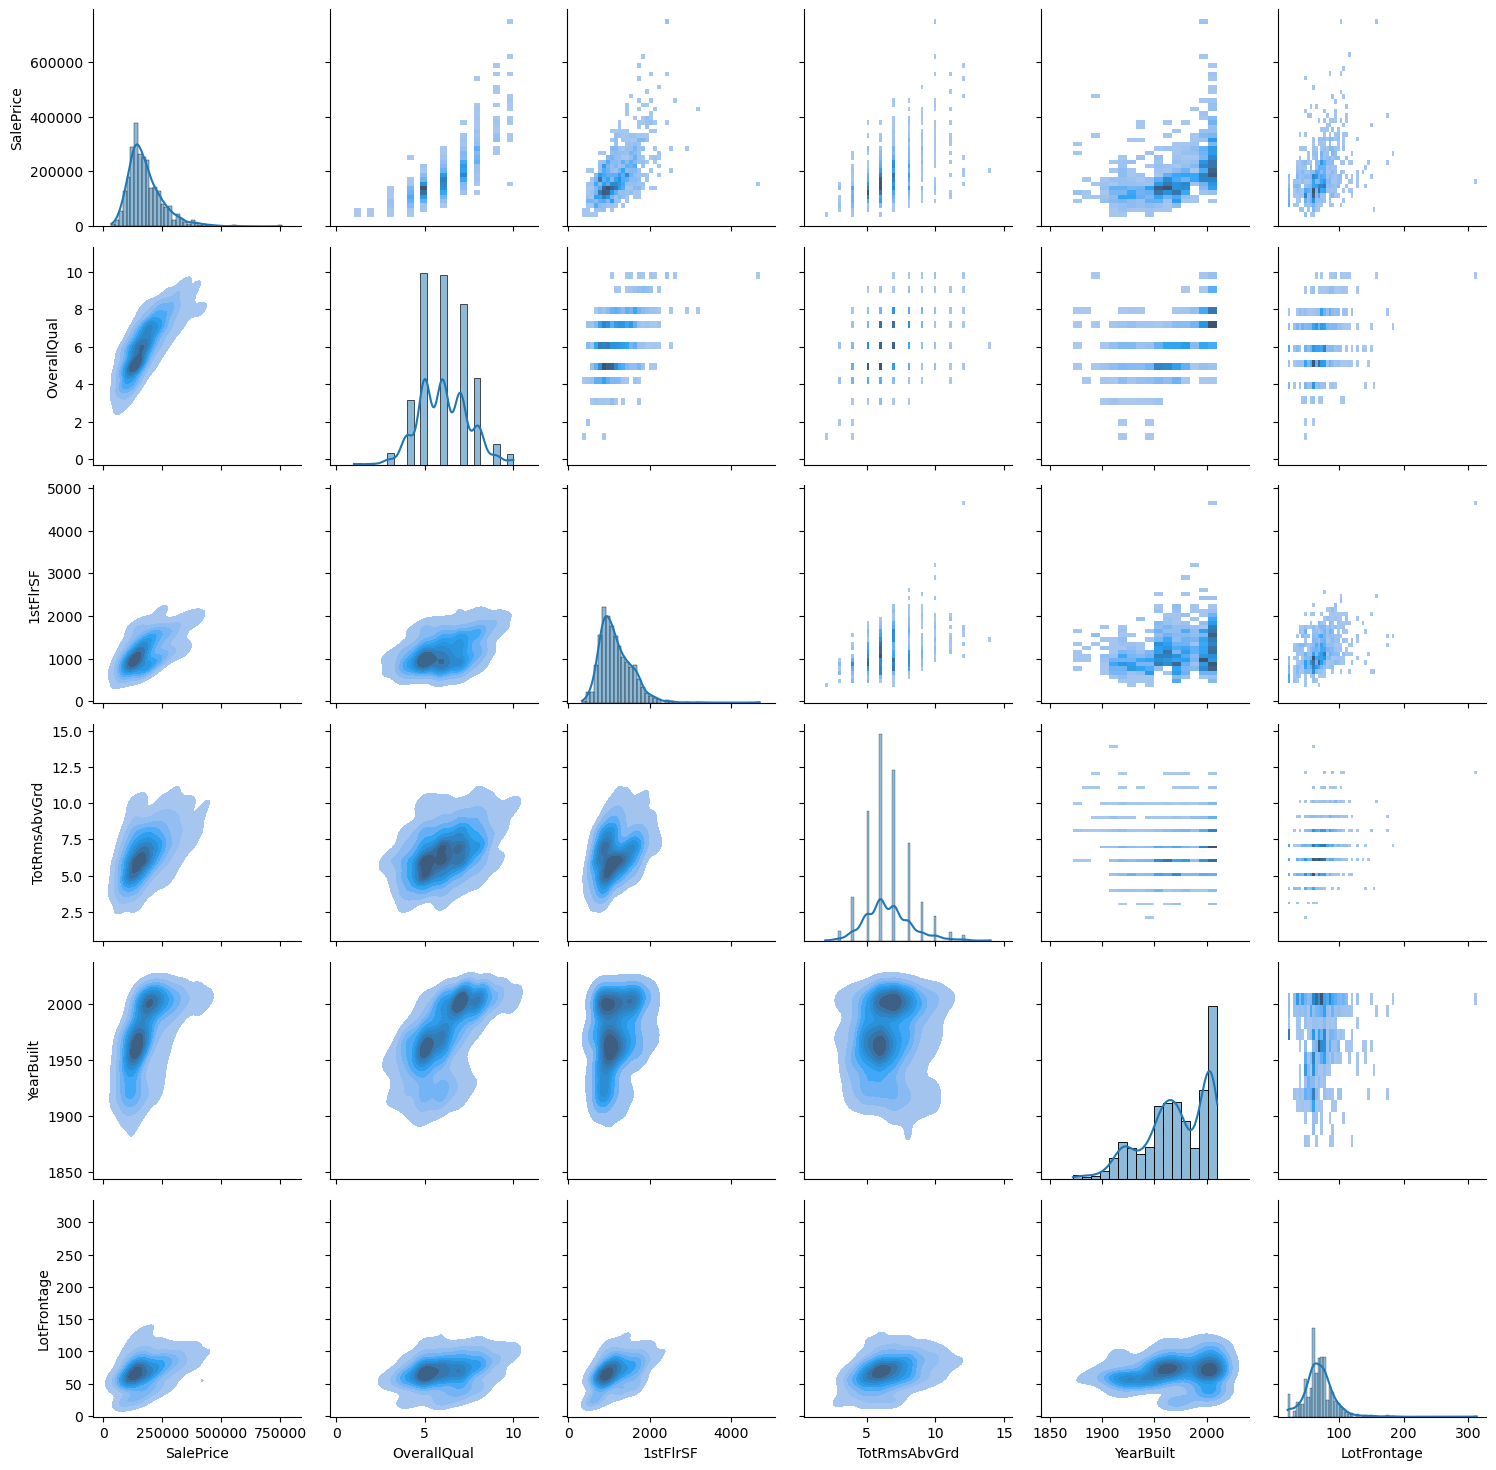

In [12]:
g = sns.PairGrid(trn_df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

## 5. RELACIONES

### Correlaciones

<AxesSubplot:>

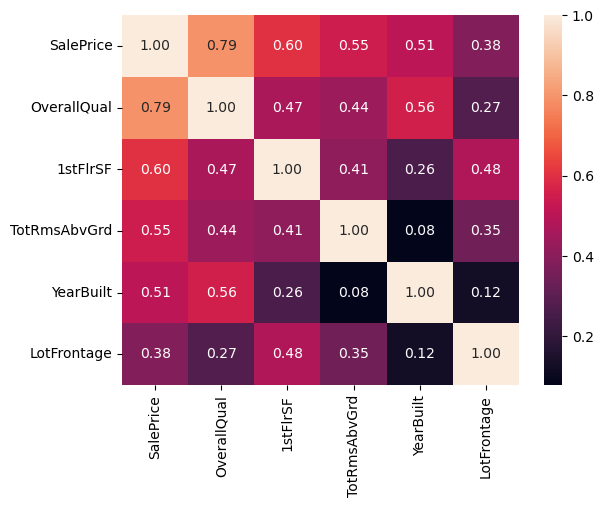

In [13]:
sns.heatmap(trn_df.corr(), annot=True, fmt=".2f")

### Correlacion con Variable dependiente

In [14]:
trn_df.corr()['SalePrice']

SalePrice       1.000000
OverallQual     0.791837
1stFlrSF        0.601104
TotRmsAbvGrd    0.545501
YearBuilt       0.505604
LotFrontage     0.381390
Name: SalePrice, dtype: float64

In [15]:
corr_vec=trn_df.corr()['SalePrice']

### Graficas 

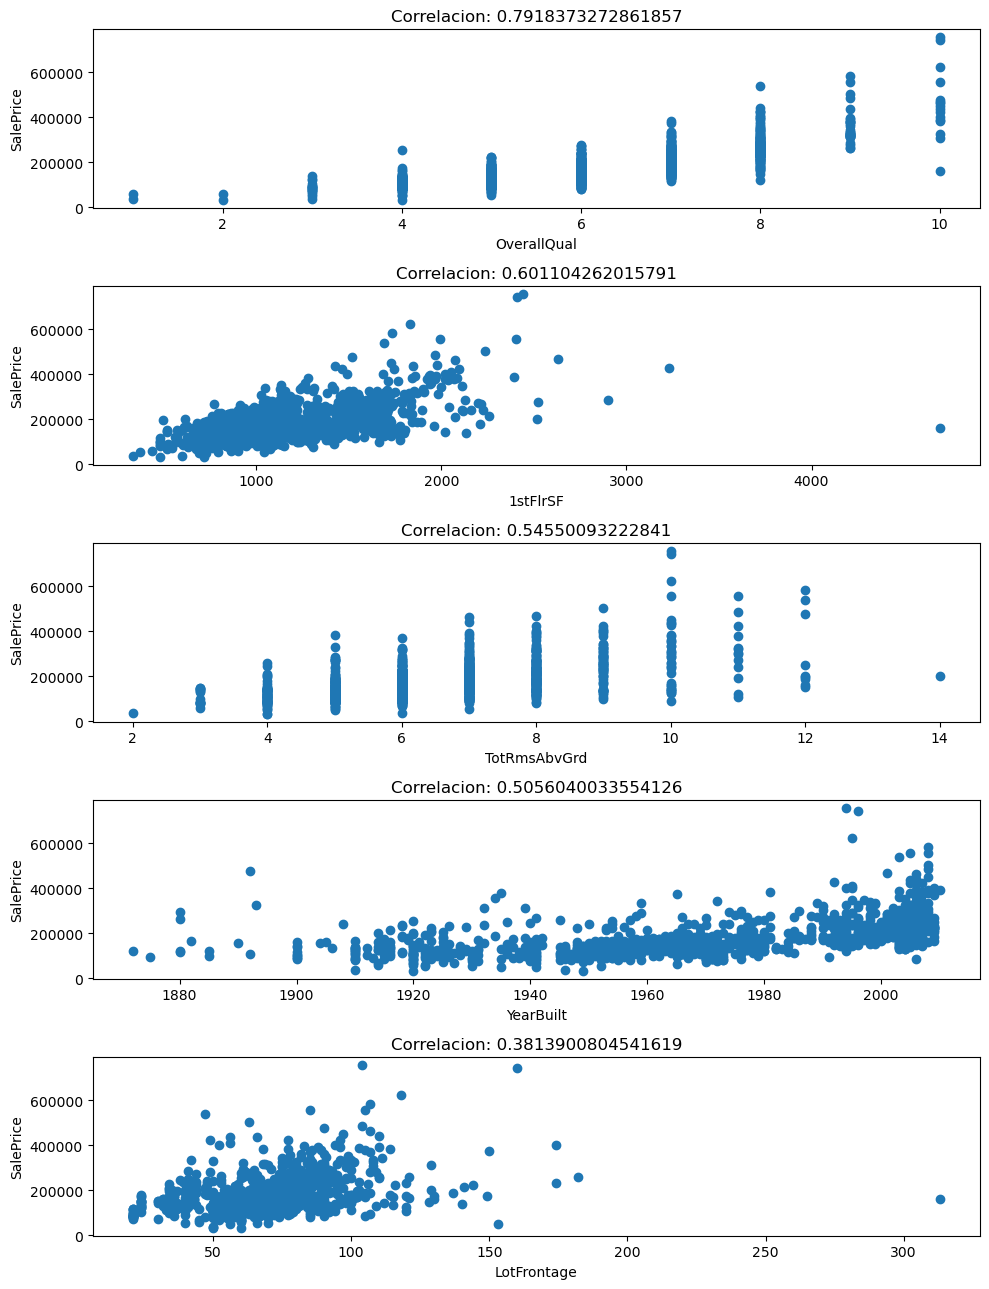

In [16]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 13))

# plot time signal:
axs[0].set_title("Correlacion: {}".format(corr_vec[1]))
axs[0].scatter(trn_df.OverallQual, trn_df.SalePrice, color='C0')
axs[0].set_xlabel("OverallQual")
axs[0].set_ylabel("SalePrice")

# plot different spectrum types:
axs[1].set_title("Correlacion: {}".format(corr_vec[2]))
axs[1].scatter(trn_df['1stFlrSF'], trn_df.SalePrice, color='C0')
axs[1].set_xlabel("1stFlrSF")
axs[1].set_ylabel("SalePrice")

axs[2].set_title("Correlacion: {}".format(corr_vec[3]))
axs[2].scatter(trn_df.TotRmsAbvGrd, trn_df.SalePrice, color='C0')
axs[2].set_xlabel("TotRmsAbvGrd")
axs[2].set_ylabel("SalePrice")


axs[3].set_title("Correlacion: {}".format(corr_vec[4]))
axs[3].scatter(trn_df.YearBuilt, trn_df.SalePrice, color='C0')
axs[3].set_xlabel("YearBuilt")
axs[3].set_ylabel("SalePrice")

axs[4].set_title("Correlacion: {}".format(corr_vec[5]))
axs[4].scatter(trn_df.LotFrontage, trn_df.SalePrice, color='C0')
axs[4].set_xlabel("LotFrontage")
axs[4].set_ylabel("SalePrice")

fig.tight_layout()
plt.show()

# Regresion por Gradient descend

In [17]:
import lib.custom_regression as c_lreg

In [18]:
def print_err(err_iter, n_sample, n_fin):
    
    n_iter=[i for i in range(0, n_fin, n_sample)]
    err_sample = err_iter[tuple(n_iter),:]
    
    
    df = pd.DataFrame(err_sample, index=n_iter)
    df = df.reset_index().melt('index', var_name='cols',  value_name='vals')

    g = sns.catplot(x="index", y="vals", hue='cols', data=df, kind='point')

## SalePrice vs OverallQual

In [19]:
regresor_v1=c_lreg.linear_regression(
                    trn_df[['OverallQual']].values,
                    trn_df[['SalePrice']].values,
                    n_epochs=150000,
                    alpha=0.01,
                    print_every_iter=10000
                              )

In [20]:
regresor_v1.fit()

Iteracion 10000, error [2.40023832e+09]
Iteracion 20000, error [2.40021082e+09]
Iteracion 30000, error [2.40021082e+09]
Iteracion 40000, error [2.40021082e+09]
Iteracion 50000, error [2.40021082e+09]
Iteracion 60000, error [2.40021082e+09]
Iteracion 70000, error [2.40021082e+09]
Iteracion 80000, error [2.40021082e+09]
Iteracion 90000, error [2.40021082e+09]
Iteracion 100000, error [2.40021082e+09]
Iteracion 110000, error [2.40021082e+09]
Iteracion 120000, error [2.40021082e+09]
Iteracion 130000, error [2.40021082e+09]
Iteracion 140000, error [2.40021082e+09]
Iteracion 150000, error [2.40021082e+09]


(array([[-94995.88208085],
        [ 45344.30653042]]),
 array([2.40021082e+09]))

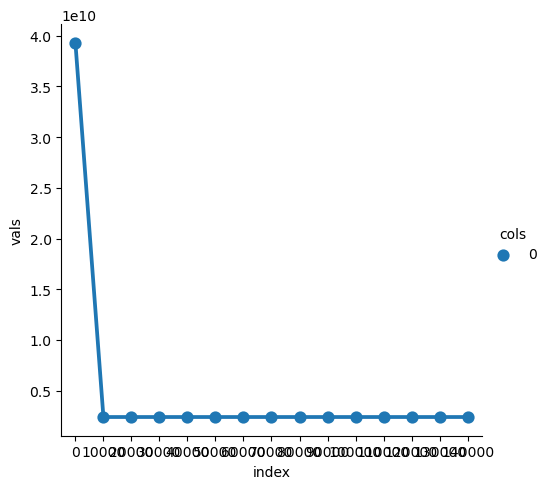

In [21]:
print_err(regresor_v1.err_iter_, regresor_v1.print_every_iter_, regresor_v1.n_epochs)

## SalePrice vs 1stFlrSF

In [22]:
regresor_v2=c_lreg.linear_regression(
                    trn_df[['1stFlrSF']].values,
                    trn_df[['SalePrice']].values,
                    n_epochs=250000,
                    alpha=5e-7,
                    print_every_iter=15000
                              )

In [23]:
regresor_v2.fit()

Iteracion 15000, error [4.25791932e+09]
Iteracion 30000, error [4.2576931e+09]
Iteracion 45000, error [4.25746723e+09]
Iteracion 60000, error [4.2572417e+09]
Iteracion 75000, error [4.25701651e+09]
Iteracion 90000, error [4.25679167e+09]
Iteracion 105000, error [4.25656717e+09]
Iteracion 120000, error [4.25634301e+09]
Iteracion 135000, error [4.2561192e+09]
Iteracion 150000, error [4.25589573e+09]
Iteracion 165000, error [4.2556726e+09]
Iteracion 180000, error [4.25544981e+09]
Iteracion 195000, error [4.25522736e+09]
Iteracion 210000, error [4.25500525e+09]
Iteracion 225000, error [4.25478348e+09]
Iteracion 240000, error [4.25456205e+09]
Iteracion 250000, error [4.25441462e+09]


(array([[483.02647704],
        [151.8791365 ]]),
 array([4.25441462e+09]))

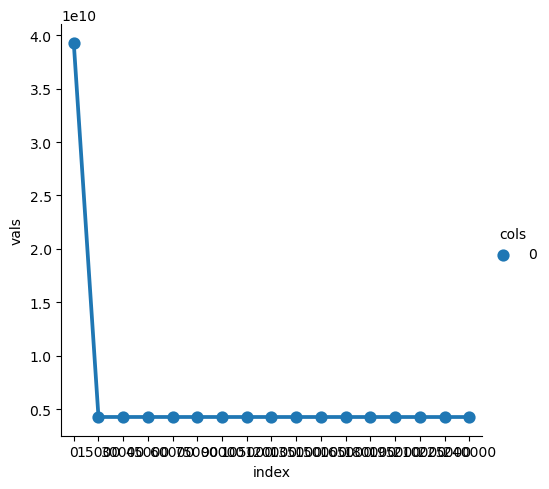

In [24]:
print_err(regresor_v2.err_iter_, regresor_v2.print_every_iter_, regresor_v2.n_epochs)

# Regresion Scikit-learn

In [25]:
from sklearn.linear_model import LinearRegression

## SalePrice vs OverallQual

In [26]:
sk_reg_v1 = LinearRegression()
sk_reg_v1.fit(trn_df[['OverallQual']].values, trn_df[['SalePrice']].values)

LinearRegression()

In [27]:
sk_reg_v1.intercept_, sk_reg_v1.coef_

(array([-94995.88208087]), array([[45344.30653042]]))

## SalePrice vs 1stFlrSF

In [28]:
sk_reg_v2 = LinearRegression()
sk_reg_v2.fit(trn_df[['1stFlrSF']].values, trn_df[['SalePrice']].values)

LinearRegression()

In [29]:
sk_reg_v2.intercept_, sk_reg_v2.coef_

(array([38140.22637933]), array([[122.85068984]]))

## Combinacion

In [30]:
def mix_modelos(obj_1, obj_2, X):
    y1=obj_1.predict(X)
    y2=obj_2.predict(X)
    return y1,y2,0.5*(y1+y2)

In [31]:
y_pred=tst_df[['SalePrice']].values

## SalePrice vs OverallQual

In [32]:
y1,y2,yp=mix_modelos(regresor_v1, sk_reg_v1, tst_df[['OverallQual']].values)

#### Error 

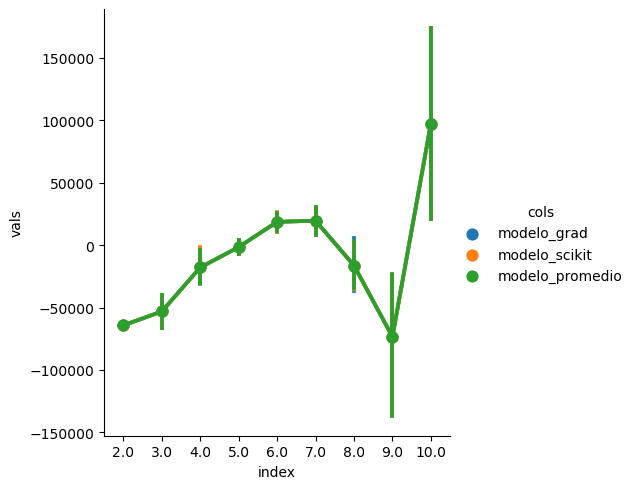

In [33]:
df_err_v1=pd.DataFrame(np.concatenate((y1-y_pred,y2-y_pred,yp-y_pred),axis=1), 
             columns=['modelo_grad','modelo_scikit','modelo_promedio'],
             index=tst_df['OverallQual'].values)
df_err_v1_ = df_err_v1.reset_index().melt('index', var_name='cols',  value_name='vals')

g = sns.catplot(x="index", y="vals", hue='cols', data=df_err_v1_, kind='point')

#### Error Cuadratico

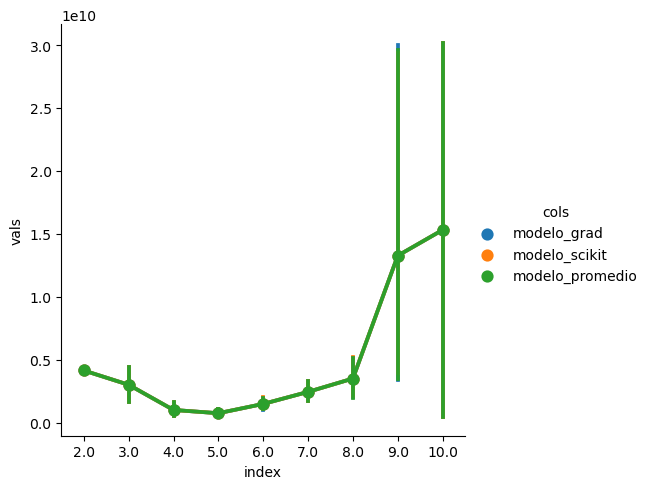

In [34]:
df_err_v1=pd.DataFrame(np.concatenate(((y1-y_pred)**2,(y2-y_pred)**2,(yp-y_pred)**2),axis=1), 
             columns=['modelo_grad','modelo_scikit','modelo_promedio'],
             index=tst_df['OverallQual'].values)
df_err_v1_ = df_err_v1.reset_index().melt('index', var_name='cols',  value_name='vals')

g = sns.catplot(x="index", y="vals", hue='cols', data=df_err_v1_, kind='point')

In [35]:
df_err_v1.describe()

,modelo_grad,modelo_scikit,modelo_promedio
count,2.920000e+02,2.920000e+02,2.920000e+02
mean,2.206035e+09,2.206035e+09,2.206035e+09
std,6.134413e+09,6.134413e+09,6.134413e+09
min,4.893996e+03,4.893996e+03,4.893996e+03
25%,1.086260e+08,1.086260e+08,1.086260e+08
50%,5.603737e+08,5.603737e+08,5.603737e+08
75%,2.204606e+09,2.204606e+09,2.204606e+09
max,8.913456e+10,8.913456e+10,8.913456e+10


## SalePrice vs 1stFlrSF

In [36]:
y1,y2,yp=mix_modelos(regresor_v2, sk_reg_v2, tst_df[['1stFlrSF']].values)

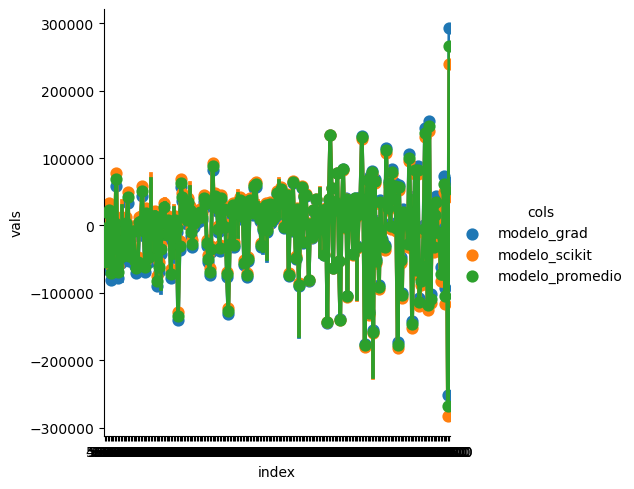

In [37]:
df_err_v2=pd.DataFrame(np.concatenate((y1-y_pred,y2-y_pred,yp-y_pred),axis=1), 
             columns=['modelo_grad','modelo_scikit','modelo_promedio'],
             index=tst_df['1stFlrSF'].values)

df_err_v2_ = df_err_v2.reset_index().melt('index', var_name='cols',  value_name='vals')

g = sns.catplot(x="index", y="vals", hue='cols', data=df_err_v2_, kind='point')

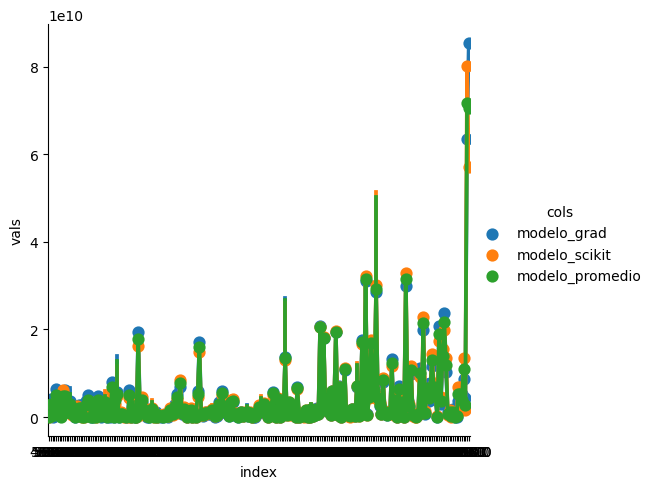

In [38]:
df_err_v2=pd.DataFrame(np.concatenate(((y1-y_pred)**2,(y2-y_pred)**2,(yp-y_pred)**2),axis=1), 
             columns=['modelo_grad','modelo_scikit','modelo_promedio'],
             index=tst_df['1stFlrSF'].values)

df_err_v2_ = df_err_v2.reset_index().melt('index', var_name='cols',  value_name='vals')

g = sns.catplot(x="index", y="vals", hue='cols', data=df_err_v2_, kind='point')

In [39]:
df_err_v2.describe()

,modelo_grad,modelo_scikit,modelo_promedio
count,2.920000e+02,2.920000e+02,2.920000e+02
mean,3.575753e+09,3.521800e+09,3.516931e+09
std,8.218646e+09,7.912749e+09,7.965479e+09
min,6.988649e+03,3.610486e+04,1.861280e+04
25%,2.159627e+08,3.244871e+08,2.171838e+08
50%,1.029146e+09,1.199032e+09,1.100457e+09
75%,3.620505e+09,3.053525e+09,3.220021e+09
max,8.545669e+10,8.014433e+10,7.161764e+10


## Conclusiones

Para la primera variable *OverallQual* los modelos alcanzaron el mismo punto de convergencia. Ninguno de los modelos es preferible sobre el otro.

Para la segunda variable *1stFlrSF* el modelo de scikit-learn en **promedio** logro un performance mejor que el modelo por gradiente en descenso desarrollado aca. Sin embargo el promedio logra un mejor performance que ambos modelos. 

Sin embargo, el modelo de gradiente en descenso presenta un mejor performance en los valores bajos de *1stFlrSF*. Tal como se ve en la grafica el error crece con la variable *1stFlrSF* y por tanto el promedio se ve sesgado hacia los valores altos en ambos casos y el modelo por scikit-learn al tener un mejor performance sobre estos valores presenta un mejor error promedio.  Esto como consecuencia tiene que el promedio de ambos modelos tendra un menor error cuadratico medio que cualquiera de los dos.